In [3]:
!pip install pyzbar

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import qrcode  # grcode 인식만
import imutils  # qrcode generator
import random
import pyzbar   # 바코드, qrcode 둘다 인식. 많이 사용
from pyzbar.pyzbar import decode  # 바코드, qrcode 둘다 인식. 많이 사용
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook

In [6]:

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# QRcode
- 바코드보다 훨씬 저장할 수 있는 정보의 양이 많음.

# 1. QRcode에서 corner 찾기
- 코너점을 잘 찾을 수 있는 예제

## 1.1. heriss corner로 출력하기

In [248]:
src = cv2.imread('./day6_rs/acronet.png', cv2.IMREAD_GRAYSCALE)
src.shape

(1060, 1060)

In [249]:
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()

harris = cv2.cornerHarris(src= src,
                          blockSize= 3,
                          ksize=3, 
                          k=0.04   
                         ) 
harris.dtype

dtype('float32')

In [250]:
# 정규화
harris_norm = cv2.normalize(src =harris, 
                            dst =None,
                            alpha =0, 
                            beta =255,
                           norm_type =cv2.NORM_MINMAX,
                           dtype=cv2.CV_8U)

harris_norm.dtype

dtype('uint8')

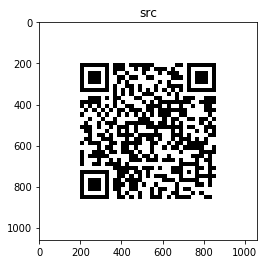

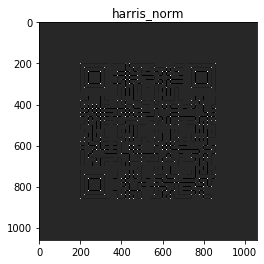

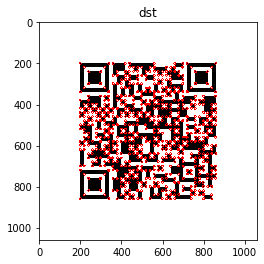

In [251]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

> 회전방향
- 모서리 네모를 가지고 회전방향을 계산해서 뒤집어진 경우 회전해서 원본으로 변환해서 사용

> 코너점을 잘 찾을 수 있는 특성 이용

## 1.2. fast detection으로 corner 찾기

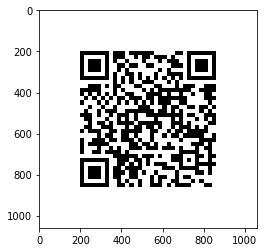

In [252]:
src = cv2.imread('./day6_rs/acronet.png', 1)
gray = cv2.imread('./day6_rs/acronet.png', cv2.IMREAD_GRAYSCALE)

imshow('', src)

In [253]:
fast = cv2.FastFeatureDetector_create(threshold=150)

In [254]:
# 특징점의 봅기, gray에서 찾기
keypoints = fast.detect(gray)
len(keypoints)

0

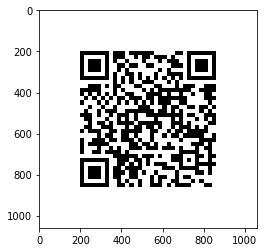

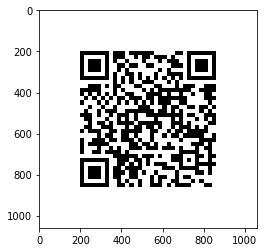

In [255]:
# 코너점 그리기
dst = src.copy()
for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255), 2)
    
imshow('', src)
imshow('', dst)

# 2. QR code 생성

In [11]:
qr = qrcode.QRCode(version = 2,
                  error_correction = qrcode.constants.ERROR_CORRECT_H,
                  box_size = 20,
                  border = 10  # Qr code 경계선
                  )
# url = 'http://www.acronet.kr/24987'  # 넣고싶은 글자

# 서울날씨: 인코딩되서 나옴
# url = 'ttps://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8'
url = 'http://www.naver.com'
qr.add_data(url)

qr.make()

img = qr.make_image(fill_color = 'black',
                    back_color = 'white')


# pil 형식.
img.save('qrcode_naver.png')




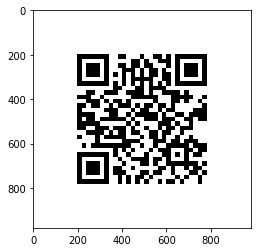

In [12]:
img = cv2.imread('qrcode_naver.png')
imshow('', img)

# 3. open cv로 QR code 인식

1. corner찾기
2. detectoin
3. decode

## 3.1. QR code 인식

In [16]:
image = cv2.imread('qrcode_naver.png')

# opencv 4.대부터 사용 가능
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)

# data: 문자 내용
# bbox: qrcode 좌표 
# rectifiedImage: 영상에서 회전될 수 있는 영상을 돌려서 qr영영만 자른 영역

data

'http://www.naver.com'

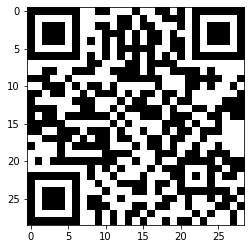

In [17]:
imshow('', rectifiedImage)

## 3.2. 멀캠 QR code 인식

In [19]:
image = cv2.imread('my_qrcode.jpg')

# opencv 4.대부터 사용 가능
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)

# data: 문자 내용
# bbox: qrcode 좌표 
# rectifiedImage: 영상에서 회전될 수 있는 영상을 돌려서 qr영영만 자른 영역

data

'C493932917950|31019'

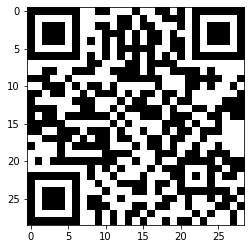

In [17]:
imshow('', rectifiedImage)

## 3.2. 위험물 관리 QR code 인식

In [21]:
image = cv2.imread('qrcode2.jpg')

# opencv 4.대부터 사용 가능
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)

# data: 문자 내용
# bbox: qrcode 좌표 
# rectifiedImage: 영상에서 회전될 수 있는 영상을 돌려서 qr영영만 자른 영역

data

'http://m.code.daum.net/mobile/view?vid=9l2r'

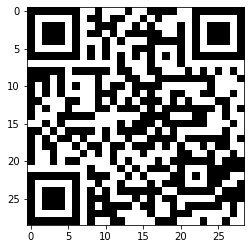

In [22]:
imshow('', rectifiedImage)

## 3.3. 강제로 자른 QR code 인식

In [25]:
image = cv2.imread('my_qrcode_rm.jpg')

# opencv 4.대부터 사용 가능
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)

# data: 문자 내용
# bbox: qrcode 좌표 
# rectifiedImage: 영상에서 회전될 수 있는 영상을 돌려서 qr영영만 자른 영역

data

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\objdetect\src\qrcode.cpp:1204: error: (-215:Assertion failed) !inarr.empty() in function 'cv::QRCodeDetector::detectAndDecode'


- 어느정도 오류가 난 것 까지는 잡을 수 있으나
- 오류가 심하면 인식 못함

# 4. pyzbar이용

> import errer
- https://www.microsoft.com/ko-kr/download/details.aspx?id=40784
- https://visualstudio.microsoft.com/ko/thank-you-downloading-visual-studio/?sku=Community&rel=16 
 - C++를 사용한 데스크톱 개발 선택하여 설치

In [26]:
!pip install pyzbar

In [4]:
from pyzbar.pyzbar import decode


In [8]:
image = cv2.imread('./day6_rs/acronet.png')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = pyzbar.pyzbar.decode(image)
print(code)

[Decoded(data=b'http://www.acronet.kr/24987', type='QRCODE', rect=Rect(left=201, top=201, width=658, height=658), polygon=[Point(x=201, y=201), Point(x=201, y=859), Point(x=859, y=859), Point(x=859, y=201)])]


Decoded(data=b'http://www.acronet.kr/24987', type='QRCODE', rect=Rect(left=201, top=201, width=658, height=658), polygon=[Point(x=201, y=201), Point(x=201, y=859), Point(x=859, y=859), Point(x=859, y=201)])


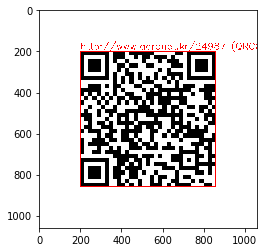

In [9]:
for barcode in code:
    print(barcode)
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

## 4.1. 여러개 인식

In [10]:
image = cv2.imread('./day6_rs/barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = pyzbar.pyzbar.decode(image)
print(code)

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)])
Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)])
Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)])
Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)])
Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)])
Decoded(data=b'OpenM

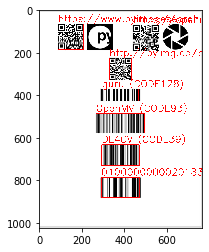

In [11]:
for barcode in code:
    print(barcode)
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)